# Using elliptic curves and isogenies in SageMath

This is a short tutorial to get started with elliptic curves in SageMath. For a complete reference, see the official documentation:

- [The "getting started" tutorial](http://doc.sagemath.org/html/en/tutorial/index.html);
- [Other SageMath tutorials](http://doc.sagemath.org/html/en/thematic_tutorials/index.html);
- [Finite fields (reference)](http://doc.sagemath.org/html/en/reference/finite_rings/index.html);
- [Number fields](http://doc.sagemath.org/html/en/constructions/number_fields.html), [reference](http://doc.sagemath.org/html/en/reference/number_fields/index.html);
- [Quadratic forms (reference)](http://doc.sagemath.org/html/en/reference/quadratic_forms/index.html);
- [Elliptic curves](http://doc.sagemath.org/html/en/constructions/elliptic_curves.html), [reference](http://doc.sagemath.org/html/en/reference/curves/index.html).

See also the book [Computational Mathematics with SageMath](http://dl.lateralis.org/public/sagebook/sagebook-ba6596d.pdf).

## Finite fields

We create finite fields by passing their cardinality

In [1]:
Fp = GF(11)

In [2]:
Fp

Finite Field of size 11

In [3]:
Fq = GF(11^2)
Fq

Finite Field in z2 of size 11^2

For extension fields, the generator is obtained with the `.gen()` function.

In [4]:
z = Fq.gen()
z

z2

In [5]:
z^120

1

In [6]:
z.multiplicative_order()

120

Same thing in one go

In [7]:
K.<t> = GF(next_prime(2^128)^2)
K

Finite Field in t of size 340282366920938463463374607431768211507^2

In [8]:
parent(t)

Finite Field in t of size 340282366920938463463374607431768211507^2

In [9]:
t.minimal_polynomial()

x^2 + x + 340282366920938463463374607431768211506

other rings

In [10]:
QQ

Rational Field

In [11]:
ZZ

Integer Ring

## Elliptic curves

Curves over $ℚ$

In [12]:
E = EllipticCurve([-10,10])
E

Elliptic Curve defined by y^2 = x^3 - 10*x + 10 over Rational Field

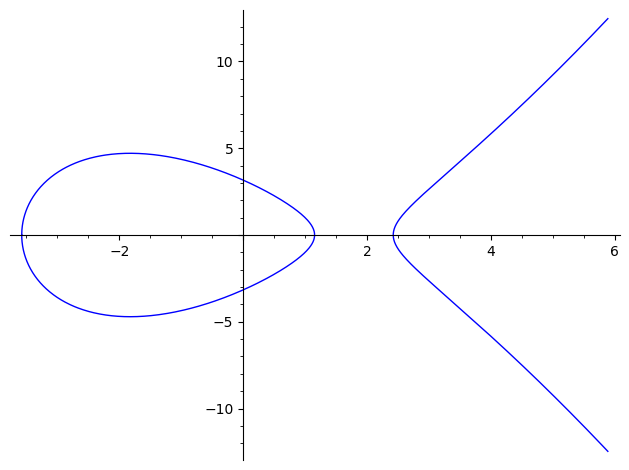

In [13]:
E.plot()

Cuvers over other fields

In [14]:
F = EllipticCurve(GF(11), [1, 0])
F

Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11

In [15]:
F.order()

12

In [16]:
F.cardinality()

12

In [17]:
F.points()

[(0 : 1 : 0),
 (0 : 0 : 1),
 (5 : 3 : 1),
 (5 : 8 : 1),
 (7 : 3 : 1),
 (7 : 8 : 1),
 (8 : 5 : 1),
 (8 : 6 : 1),
 (9 : 1 : 1),
 (9 : 10 : 1),
 (10 : 3 : 1),
 (10 : 8 : 1)]

In [18]:
P = F.random_point()
P

(7 : 8 : 1)

In [19]:
P.order()

12

Curves over number fields

In [20]:
K = QQ[i]
K

Number Field in I with defining polynomial x^2 + 1 with I = 1*I

In [21]:
E = EllipticCurve(K, j=0)
E

Elliptic Curve defined by y^2 = x^3 + 1 over Number Field in I with defining polynomial x^2 + 1 with I = 1*I

In [22]:
E.torsion_order()

6

In [23]:
E.torsion_points()

[(0 : 1 : 0),
 (-1 : 0 : 1),
 (0 : -1 : 1),
 (0 : 1 : 1),
 (2 : -3 : 1),
 (2 : 3 : 1)]

In [24]:
E.rank()

0

In [25]:
E = EllipticCurve(j=1)
E

Elliptic Curve defined by y^2 + x*y = x^3 + 36*x + 3455 over Rational Field

In [26]:
E.short_weierstrass_model()

Elliptic Curve defined by y^2 = x^3 + 46629*x + 161056566 over Rational Field

In [27]:
E.torsion_order()

1

In [28]:
E.rank()

2

In [29]:
P, Q = E.gens()
P, Q

((13 : 72 : 1), (43 : 270 : 1))

In [30]:
P.order()

+Infinity

In [31]:
P + P

(-14 : 23 : 1)

In [32]:
13*P

(2738814396081478074164342358580444642585010217987286322086213/29439691676132293080318764323353351862155591578774792639929 : 4322772205991782791649180930126846791518251982934842146164121658655553155126660057907684920/5051261892530217040902924725666439913266827080618013578371709184537008691430244914816467 : 1)

Watch out: computing the rank is not always easy!

In [33]:
EK = E.change_ring(K)
EK

Elliptic Curve defined by y^2 + x*y = x^3 + 36*x + 3455 over Number Field in I with defining polynomial x^2 + 1 with I = 1*I

In [34]:
EK.rank()

ValueError: There is insufficient data to determine the rank - 2-descent gave lower bound 1 and upper bound 3

## Isomorphisms

In [35]:
F = EllipticCurve(GF(11), [1, 0])
F

Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11

In [36]:
F.automorphisms()

[Elliptic-curve endomorphism of Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11
   Via:  (u,r,s,t) = (1, 0, 0, 0),
 Elliptic-curve endomorphism of Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11
   Via:  (u,r,s,t) = (10, 0, 0, 0)]

In [37]:
aut = F.change_ring(GF(11^2)).automorphisms()
aut

[Elliptic-curve endomorphism of Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2
   Via:  (u,r,s,t) = (1, 0, 0, 0),
 Elliptic-curve endomorphism of Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2
   Via:  (u,r,s,t) = (10, 0, 0, 0),
 Elliptic-curve endomorphism of Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2
   Via:  (u,r,s,t) = (4*z2 + 3, 0, 0, 0),
 Elliptic-curve endomorphism of Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2
   Via:  (u,r,s,t) = (7*z2 + 8, 0, 0, 0)]

In [38]:
aut[3], aut[3]^2

(Elliptic-curve endomorphism of Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2
   Via:  (u,r,s,t) = (7*z2 + 8, 0, 0, 0),
 Elliptic-curve endomorphism of Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2
   Via:  (u,r,s,t) = (10, 0, 0, 0))

In [39]:
G = EllipticCurve(GF(11), [3, 0])
F.is_isomorphic(G)

True

In [40]:
G

Elliptic Curve defined by y^2 = x^3 + 3*x over Finite Field of size 11

In [41]:
G.j_invariant()

1

In [42]:
u = F.isomorphism_to(G)
u

Elliptic-curve morphism:
  From: Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11
  To:   Elliptic Curve defined by y^2 = x^3 + 3*x over Finite Field of size 11
  Via:  (u,r,s,t) = (8, 0, 0, 0)

Group structure

In [43]:
F.abelian_group()

Additive abelian group isomorphic to Z/12 embedded in Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11

In [44]:
g = F.gens()[0]
g

(7 : 8 : 1)

In [45]:
g.order()

12

## Scalar multiplication

In [46]:
F = EllipticCurve(GF(11), [1, 0])
g = F.gens()[0]
g

(7 : 8 : 1)

In [47]:
12*g

(0 : 1 : 0)

In [48]:
[(i, i*g) for i in range(12)]

[(0, (0 : 1 : 0)),
 (1, (7 : 8 : 1)),
 (2, (9 : 1 : 1)),
 (3, (10 : 8 : 1)),
 (4, (5 : 3 : 1)),
 (5, (8 : 6 : 1)),
 (6, (0 : 0 : 1)),
 (7, (8 : 5 : 1)),
 (8, (5 : 8 : 1)),
 (9, (10 : 3 : 1)),
 (10, (9 : 10 : 1)),
 (11, (7 : 3 : 1))]

Let's print the multiplication maps

In [49]:
F.multiplication_by_m(12)

((x^144 - 2*x^138 - 2*x^136 - x^134 + 3*x^132 - 5*x^130 - 5*x^128 - 5*x^126 - 4*x^124 + 5*x^122 + x^120 + 4*x^118 - 2*x^116 - 3*x^114 + 5*x^112 - 2*x^110 + 2*x^108 - x^106 - 4*x^104 + x^102 - 4*x^100 + 5*x^98 + x^94 - 4*x^92 - 3*x^90 - 3*x^88 + 3*x^86 - 3*x^84 - 4*x^82 + 3*x^80 + 2*x^78 + 5*x^76 + 2*x^74 - 2*x^72 + 2*x^70 + 5*x^68 + 2*x^66 + 3*x^64 - 4*x^62 - 3*x^60 + 3*x^58 - 3*x^56 - 3*x^54 - 4*x^52 + x^50 + 5*x^46 - 4*x^44 + x^42 - 4*x^40 - x^38 + 2*x^36 - 2*x^34 + 5*x^32 - 3*x^30 - 2*x^28 + 4*x^26 + x^24 + 5*x^22 - 4*x^20 - 5*x^18 - 5*x^16 - 5*x^14 + 3*x^12 - x^10 - 2*x^8 - 2*x^6 + 1)/(x^143 - 2*x^137 - 2*x^135 - x^133 + 3*x^131 - 5*x^129 - 5*x^127 - 5*x^125 - 4*x^123 + 5*x^121 + x^119 + 4*x^117 - 2*x^115 - 3*x^113 + 5*x^111 - 2*x^109 + 2*x^107 - x^105 - 4*x^103 + x^101 - 4*x^99 + 5*x^97 + x^93 - 4*x^91 - 3*x^89 - 3*x^87 + 3*x^85 - 5*x^83 - 5*x^81 - 5*x^79 - x^77 + 3*x^75 - x^73 - x^71 + 3*x^69 - x^67 - 5*x^65 - 5*x^63 - 5*x^61 + 3*x^59 - 3*x^57 - 3*x^55 - 4*x^53 + x^51 + 5*x^47 - 

Using LaTeX-ified output is much nicer

In [50]:
%display latex

In [51]:
F.multiplication_by_m(12, x_only=True)

(x^144 + 9*x^138 + 9*x^136 + 10*x^134 + 3*x^132 + 6*x^130 + 6*x^128 + 6*x^126 + 7*x^124 + 5*x^122 + x^120 + 4*x^118 + 9*x^116 + 8*x^114 + 5*x^112 + 9*x^110 + 2*x^108 + 10*x^106 + 7*x^104 + x^102 + 7*x^100 + 5*x^98 + x^94 + 7*x^92 + 8*x^90 + 8*x^88 + 3*x^86 + 8*x^84 + 7*x^82 + 3*x^80 + 2*x^78 + 5*x^76 + 2*x^74 + 9*x^72 + 2*x^70 + 5*x^68 + 2*x^66 + 3*x^64 + 7*x^62 + 8*x^60 + 3*x^58 + 8*x^56 + 8*x^54 + 7*x^52 + x^50 + 5*x^46 + 7*x^44 + x^42 + 7*x^40 + 10*x^38 + 2*x^36 + 9*x^34 + 5*x^32 + 8*x^30 + 9*x^28 + 4*x^26 + x^24 + 5*x^22 + 7*x^20 + 6*x^18 + 6*x^16 + 6*x^14 + 3*x^12 + 10*x^10 + 9*x^8 + 9*x^6 + 1)/(x^143 + 9*x^137 + 9*x^135 + 10*x^133 + 3*x^131 + 6*x^129 + 6*x^127 + 6*x^125 + 7*x^123 + 5*x^121 + x^119 + 4*x^117 + 9*x^115 + 8*x^113 + 5*x^111 + 9*x^109 + 2*x^107 + 10*x^105 + 7*x^103 + x^101 + 7*x^99 + 5*x^97 + x^93 + 7*x^91 + 8*x^89 + 8*x^87 + 3*x^85 + 6*x^83 + 6*x^81 + 6*x^79 + 10*x^77 + 3*x^75 + 10*x^73 + 10*x^71 + 3*x^69 + 10*x^67 + 6*x^65 + 6*x^63 + 6*x^61 + 3*x^59 + 8*x^57 + 8*x^55 + 7*x^53 + x^51 + 5*x^47 + 7*x^45 + x^43 + 7*x^41 + 10*x^39 + 2*x^37 + 9*x^35 + 5*x^33 + 8*x^31 + 9*x^29 + 4*x^27 + x^25 + 5*x^23 + 7*x^21 + 6*x^19 + 6*x^17 + 6*x^15 + 3*x^13 + 10*x^11 + 9*x^9 + 9*x^7 + x)

In [52]:
m3 = F.multiplication_by_m(3)
m3

((x^9 - x^7 - 3*x^5 + 3*x^3 - 2*x)/(-2*x^8 + 3*x^6 - 3*x^4 - x^2 + 1),
 (-4*x^12*y + 5*x^6*y + 3*x^4*y - 3*x^2*y + y)/(2*x^12 + x^10 - 3*x^6 + 5*x^2 + 4))

In [53]:
d3 = m3[0].denominator()
d3

-2*x^8 + 3*x^6 - 3*x^4 - x^2 + 1

In [54]:
parent(d3)

Multivariate Polynomial Ring in x, y over Finite Field of size 11

The multiplication maps are rational fractions in $x$ and $y$, so if we want the denominator as a polynomial in $x$ we need to convert it explicitly

In [55]:
d3 = d3.univariate_polynomial()
parent(d3)

Univariate Polynomial Ring in x over Finite Field of size 11

In [56]:
d3.factor()

(9) * (x + 5)^2 * (x + 6)^2 * (x^2 + 5)^2

Given an $x$-coordinate, we can get a point with that coordinate, if it exists

In [57]:
P = F.lift_x(-6)
P

(5 : 3 : 1)

In [58]:
P.order()

3

In [59]:
Q = F.lift_x(-5)

ValueError: No point with x-coordinate 6 on Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11

In [60]:
F

Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11

In [61]:
y5 = GF(11)(-5^3 -5)
y5

2

In [62]:
y5.is_square()

False

In [63]:
%display plain

If we change the base ring of the curve (e.g. from $𝔽_{11}$ to $𝔽_{121}$), more points appear

In [64]:
F2 = F.change_ring(GF(11^2))
F2

Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2

In [65]:
Q = F2.lift_x(-5)
Q

(6 : z2 + 9 : 1)

In [66]:
Q.order()

3

However we cannot mindlessly combine points over $𝔽_{11}$ with points over $𝔽_{121}$

In [67]:
P + Q

TypeError: unsupported operand parent(s) for +: 'Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11' and 'Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2'

We must instead explicitly lift the points from $E/𝔽_{11}$ to $E/𝔽_{121}$

In [68]:
P2 = F2(P)

In [69]:
P2 + Q

(5*z2 + 1 : 9*z2 + 9 : 1)

Here is the full 3-torsion subgroup

In [70]:
[i*P2 + j*Q for i in range(3) for j in range(3)]

[(0 : 1 : 0),
 (6 : z2 + 9 : 1),
 (6 : 10*z2 + 2 : 1),
 (5 : 3 : 1),
 (5*z2 + 1 : 9*z2 + 9 : 1),
 (6*z2 + 10 : 2*z2 + 1 : 1),
 (5 : 8 : 1),
 (6*z2 + 10 : 9*z2 + 10 : 1),
 (5*z2 + 1 : 2*z2 + 2 : 1)]

We check that the $x$-coordinates correspond to the roots of the denominator of the multiplication-by-3 map we had previously computed

In [71]:
d3

9*x^8 + 3*x^6 + 8*x^4 + 10*x^2 + 1

In [72]:
d3.roots(GF(11^2))

[(6, 2), (5, 2), (6*z2 + 10, 2), (5*z2 + 1, 2)]

And we check that the denominator is the square of the 3-division polynomial

In [73]:
d3.is_square()

True

In [74]:
d3.sqrt()

3*x^4 + 6*x^2 + 10

In [75]:
F.division_polynomial(3)

3*x^4 + 6*x^2 + 10

## Your turn!

### Exercise 1 ★

Give the list of all supsersingular elliptic curves over $\mathbb{F}_{101^2}$

### Exercise 2 ★

Find a random curve over $𝔽_{127}$ with $129$ points.



#### Exercise 2.2 ★★

Let $E$ be one such curve. What is the degree of the smallest extension $k$ of $𝔽_{127}$ such that $E(k)[129] \simeq ℤ/129ℤ × ℤ/129ℤ$?



#### Exercise 2.3  ★★

List all isogenies with kernel of size 43 (i.e., of degree 43) defined over $\mathbb{F}_{127}$.

#### Exercise 2.4 ★★

How many isogenies of degree 43 does the curve have over $\mathbb{F}_{127^7}?